In [3]:
import glob
import soundfile as sf

from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

import numpy as np

flac_fns = glob.glob('../ASMR collection/*/*.flac')
flac_num = len(flac_fns)
print(flac_num)
distance_mat = np.zeros([flac_num,flac_num])

107


In [22]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

In [26]:
ipd.Audio(flac_fns[i])

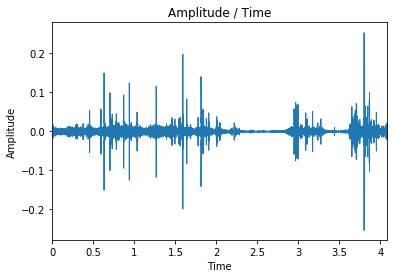

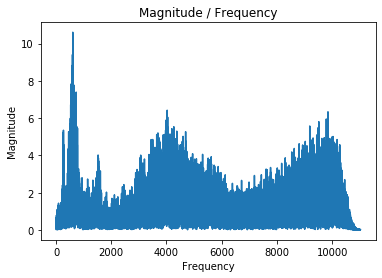

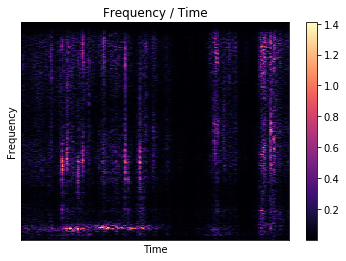

(1025, 176)

In [27]:
i = 1
# load audio data using sample rate 22050 (default value)
signal, sr = librosa.load(flac_fns[i], sr=22050)
librosa.display.waveplot(signal, sr=sr)
plt.title('Amplitude / Time')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()
# using FFT transform to spectrum signal
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))
left_frequency = frequency[:int(len(frequency)/2)] # the frequency is symetric, so we only need half of them
left_magnitude = magnitude[:int(len(frequency)/2)]
plt.plot(left_frequency, left_magnitude)
plt.title('Magnitude / Frequency')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()
# using STFT get the spectrogram
n_fft = 2048
hop_length = 512
stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.title('Frequency / Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()
spectrogram.shape

In [21]:
magnitude.shape

(99474,)

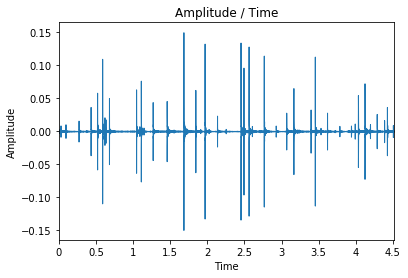

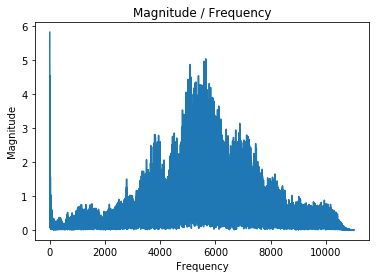

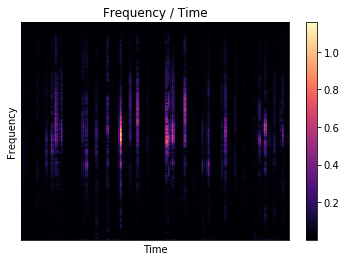

(1025, 195)

In [29]:
i = 0
# load audio data using sample rate 22050 (default value)
signal, sr = librosa.load(flac_fns[i], sr=22050)
librosa.display.waveplot(signal, sr=sr)
plt.title('Amplitude / Time')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()
# using FFT transform to spectrum signal
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))
left_frequency = frequency[:int(len(frequency)/2)] # the frequency is symetric, so we only need half of them
left_magnitude = magnitude[:int(len(frequency)/2)]
plt.plot(left_frequency, left_magnitude)
plt.title('Magnitude / Frequency')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()
# using STFT get the spectrogram
n_fft = 2048
hop_length = 512
stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.title('Frequency / Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()
spectrogram.shape

In [20]:
magnitude.shape

(99474,)

In [ ]:
from scipy import stats
sounds = []
for i in range(flac_num):
    fn = flac_fns[i]
    data_i = [np.sqrt(np.mean(block**2)) for block in sf.blocks(fn, blocksize=1024, overlap=512)]
    sounds += [data_i]

sounds_norm = []
for data_i in sounds:
    z_data_i = stats.zscore(data_i)
    sounds_norm += [z_data_i]

In [ ]:
fn = flac_fns[0]

for i in range(flac_num):
    for j in range(flac_num):
        if i == j:
            continue
        data_i = sounds_norm[i]
        data_j = sounds_norm[j]
        
        distance_mat[i,j] = fastdtw(data_i, data_j, dist=euclidean)


In [ ]:
import pickle
with open('distance_mat.pkl', 'wb') as f:
    pickle.dump(distance_mat, f)

In [ ]:
import scipy
import scipy.cluster

In [ ]:
distance_mat_scipy = scipy.spatial.distance.squareform(distance_mat)

In [ ]:
Z = scipy.cluster.hierarchy.linkage(distance_mat_scipy, method='ward', metric='euclidean', optimal_ordering=True)

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25, 10))
dn = scipy.cluster.hierarchy.dendrogram(Z)
plt.savefig('result.pdf')
plt.show()

In [ ]:
for i in range(flac_num):
    print(i, flac_fns[i])

In [ ]:
# fn = flac_fns[0]
# # data_i, _ = sf.read(fn)
# data_i = [np.sqrt(np.mean(block**2)) for block in sf.blocks(fn, blocksize=1024, overlap=512)]
# fn = flac_fns[1]
# # data_j, _ = sf.read(fn)
# data_j = [np.sqrt(np.mean(block**2)) for block in sf.blocks(fn, blocksize=1024, overlap=512)]

# dist, path = fastdtw(data_i, data_j, dist=euclidean)
# print(dist)

In [ ]:
# fn = flac_fns[1]
# # data_i, _ = sf.read(fn)
# data_i = [np.sqrt(np.mean(block**2)) for block in sf.blocks(fn, blocksize=1024, overlap=512)]
# fn = flac_fns[0]
# # data_j, _ = sf.read(fn)
# data_j = [np.sqrt(np.mean(block**2)) for block in sf.blocks(fn, blocksize=1024, overlap=512)]

# dist, path = fastdtw(data_i, data_j, dist=euclidean)
# print(dist)

In [ ]:
# argsort_ind = np.argsort(distance_mat[3,:])
# print(argsort_ind)

In [ ]:
# distance_mat[3, argsort_ind]